# chess opening analys

## import library we need in this analys

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## get data from exel file

In [52]:
df = pd.read_excel('chess_dataset.xlsx')
df.head(1)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1500000000000,1500000000000,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5


## select the importent columns in df

In [53]:
idf = df[['rated', 'turns', 'victory_status', 'winner', 'increment_code', 'white_rating', 'black_rating', 'opening_name']]
idf.head(1)

,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name
0,False,13,outoftime,white,15+2,1500,1191,Slav Defense: Exchange Variation


## clean idf dataframe

### split opening and wariant

In [54]:
idf['variant'] = idf['opening_name'].str.split(':', expand=True)[1]
idf['opening_name'] = idf['opening_name'].str.split(':', expand=True)[0]
idf.head(1)

C:\Users\Mr_shotgun\AppData\Local\Temp\ipykernel_3948\612733503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['variant'] = idf['opening_name'].str.split(':', expand=True)[1]
C:\Users\Mr_shotgun\AppData\Local\Temp\ipykernel_3948\612733503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idf['opening_name'] = idf['opening_name'].str.split(':', expand=True)[0]


,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name,variant
0,False,13,outoftime,white,15+2,1500,1191,Slav Defense,Exchange Variation


### drop null row

In [55]:
idf.isnull().sum()

rated                0
turns                0
victory_status       0
winner               0
increment_code       0
white_rating         0
black_rating         0
opening_name         0
variant           6928
dtype: int64

> tip: I have no problem with the variant column having a null value.

### drop rows where the victoryـstatus is in an unacceptable state.

In [56]:
unacceptable_in_victory_status = len(idf[idf['victory_status'].isin(['outoftime', 'draw'])])
print("Number of rows that do not have acceptable victory_status data: ", unacceptable_in_victory_status)
idf = idf[~idf['victory_status'].isin(['outoftime', 'draw'])]
print("idf shape after removing unacceptables: ", idf.shape)
idf = idf.reset_index(drop=True)
idf.head()

Number of rows that do not have acceptable victory_status data:  2586
idf shape after removing unacceptables:  (17472, 9)


,rated,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_name,variant
0,True,16,resign,black,5+10,1322,1261,Nimzowitsch Defense,Kennedy Variation
1,True,61,mate,white,5+10,1496,1500,King's Pawn Game,Leonardis Variation
2,True,61,mate,white,20+0,1439,1454,Queen's Pawn Game,Zukertort Variation
3,True,95,mate,white,30+3,1523,1469,Philidor Defense,None
4,True,33,resign,white,10+0,1520,1423,Blackmar-Diemer Gambit,Pietrowsky Defense


## targeted data: 
- Total number of openings
- Number of games available in each opening
- The best opening for white and black in the top ten openings
- The best opening for White in the three rating categories
- The best opening for black in the three rating categories

### total number of openings:

In [57]:
print("total number of openings:",idf['opening_name'].nunique())

total number of openings: 224


### number of games available in each opening:

In [58]:
print("number of game in each opening:",idf['opening_name'].value_counts())

number of game in each opening: opening_name
Sicilian Defense                                                2230
French Defense                                                  1144
Queen's Pawn Game                                                928
Italian Game                                                     861
King's Pawn Game                                                 797
                                                                ... 
King's Gambit Accepted |  Bishop's Gambit |  Maurian Defense       1
King's Gambit |  Falkbeer Countergambit |  Hinrichsen Gambit       1
King's Gambit Accepted |  Ghulam-Kassim Gambit                     1
Barnes Opening                                                     1
King's Gambit |  Falkbeer Countergambit |  Miles Gambit            1
Name: count, Length: 224, dtype: int64


#### plot top ten openings:

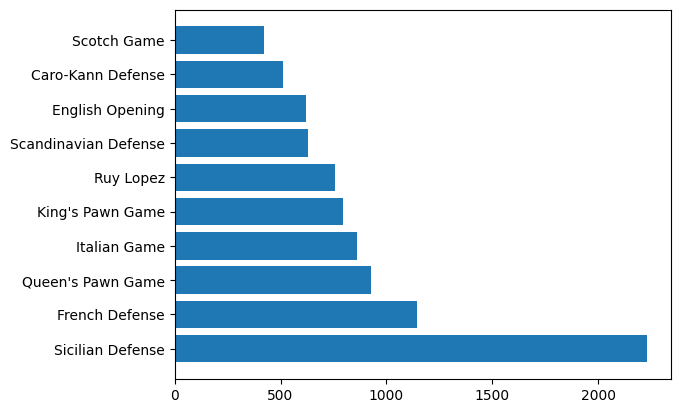

In [59]:
most_played = idf['opening_name'].value_counts().head(10).to_dict()
openings = list(most_played.keys())
count_openings = list(most_played.values())

fig, ax = plt.subplots()

ax.barh(openings, count_openings, align='center')

plt.show()

### To continue, we need a data frame with an equal number of games in each opening.

In [60]:
# creating valid data frame
valid_opening = list(idf['opening_name'].value_counts().head(10).keys())
valid_opening_df = idf[idf['opening_name'].isin(valid_opening)].reset_index(drop=True)

# find min game in one opening
min_valid_opening_count = valid_opening_df['opening_name'].value_counts().min()

# creat a equal game in each opening datafram
equal_game_by_opening = valid_opening_df.groupby('opening_name').apply(lambda x: x.sample(n=min_valid_opening_count, random_state=42)).reset_index(drop=True)

print("valid opening: \n", "\n".join(valid_opening) )
print("***"*20)
print("count game in eche opening: ", equal_game_by_opening['opening_name'].value_counts())

valid opening: 
 Sicilian Defense
French Defense
Queen's Pawn Game
Italian Game
King's Pawn Game
Ruy Lopez
Scandinavian Defense
English Opening
Caro-Kann Defense
Scotch Game
************************************************************
count game in eche opening:  opening_name
Caro-Kann Defense       421
English Opening         421
French Defense          421
Italian Game            421
King's Pawn Game        421
Queen's Pawn Game       421
Ruy Lopez               421
Scandinavian Defense    421
Scotch Game             421
Sicilian Defense        421
Name: count, dtype: int64


C:\Users\Mr_shotgun\AppData\Local\Temp\ipykernel_3948\1441065813.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  equal_game_by_opening = valid_opening_df.groupby('opening_name').apply(lambda x: x.sample(n=min_valid_opening_count, random_state=42)).reset_index(drop=True)


### The best opening for white and black in the top ten openings
plot the best opening for white and black:

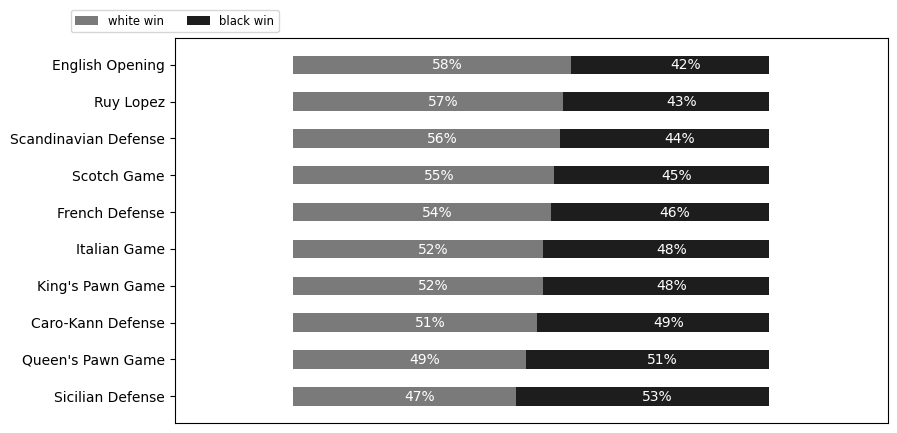

In [61]:
white_winner_opening = equal_game_by_opening[equal_game_by_opening['winner'] == 'white'].value_counts("opening_name").to_dict()

valid_opening = list(white_winner_opening.keys())
white_win = list(white_winner_opening.values())
black_win = [min_valid_opening_count - x for x in white_win]
category_name = ['white win', 'black win']

def compare_plot(labels, value_one, value_two, category_name):

    category_color = plt.colormaps['Greys'](np.array([0.6, 0.9]))

    fig, ax = plt.subplots(figsize=(9.2,5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(-min_valid_opening_count*(3/4), min_valid_opening_count*(3/4))
    bar_height = 0.5

    # plot bars
    ax.barh(labels, value_one, height=bar_height,
            left=[-min_valid_opening_count/2],
            label=category_name[0], color=category_color[0])
    
    ax.barh(labels, value_two, height=bar_height,
            left=[(-min_valid_opening_count/2) + w for w in white_win],
            label=category_name[1], color=category_color[1])
    
    # add percent
    percent_value_one = [round((v1 / (v1 + v2)) * 100 ) for v1, v2 in zip(value_one, value_two)]
    percent_value_two = [round((v2 / (v2 + v1)) * 100) for v1, v2 in zip(value_one, value_two)]

    for i, label in enumerate(valid_opening):
        ax.text((-min_valid_opening_count/2) + value_one[i]/2, y=i+(bar_height/4), s=f"{percent_value_one[i]}%", color='white')
        ax.text((-min_valid_opening_count/2) + value_one[i] + value_two[i]/2, y=i+(bar_height/4), s=f"{percent_value_two[i]}%", color='white')
    
    ax.legend(ncols=len(category_name), bbox_to_anchor=(0,1), loc="lower center", fontsize='small')
    
    return fig, ax

compare_plot(valid_opening, white_win, black_win, category_name)
plt.show()


### The best opening for White and black in the three rating categories

#### best opening for white and black in the rating under 1200

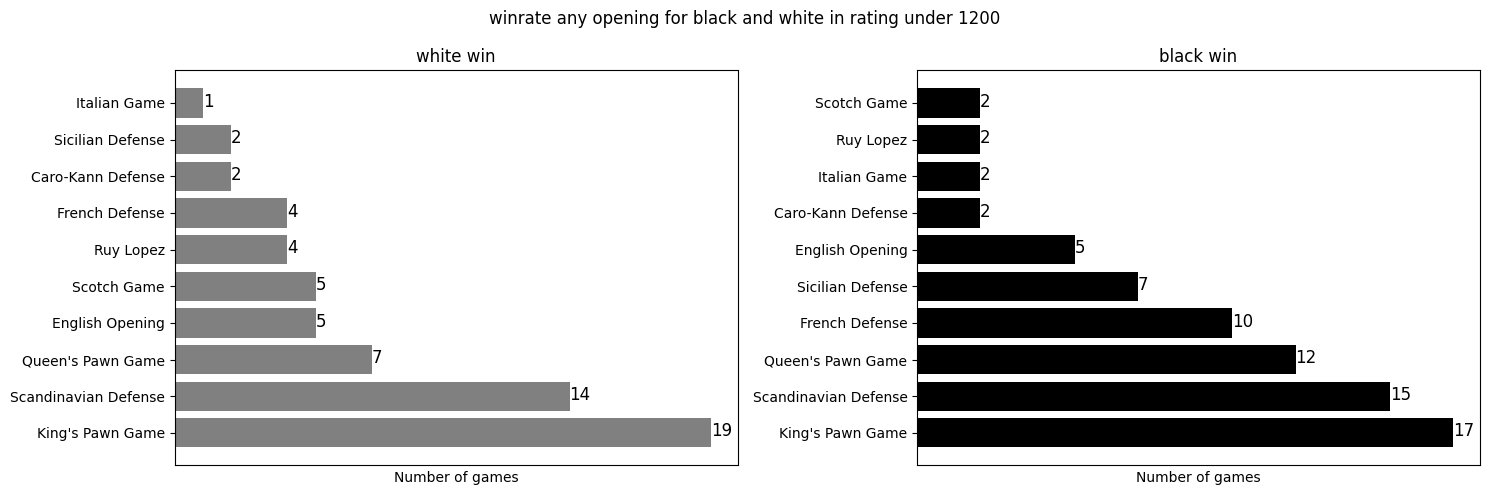

In [62]:
rating_under1200 = equal_game_by_opening[(equal_game_by_opening['white_rating'] <= 1220) & (equal_game_by_opening['black_rating'] <= 1220)]

white_win = rating_under1200[rating_under1200['winner'] == 'white'].value_counts('opening_name').to_dict()
black_win = rating_under1200[rating_under1200['winner'] == 'black'].value_counts('opening_name').to_dict()

info_barh1 = {"title": "white win",
              "bar_color": "gray",
              "y": list(white_win.keys()),
              "x": list(white_win.values()),
              "x_label": "Number of games"}
info_barh2 = {"title": "black win",
              "bar_color": "black",
              "y": list(black_win.keys()),
              "x": list(black_win.values()),
              "x_label": "Number of games"}
plt_info = {"figsize": (15,5),
            "plt_title": "winrate any opening for black and white in rating under 1200"}


def barh_2(barh1_info, barh2_info, plt_info=None):
    fig, axes = plt.subplots(1, 2, figsize=plt_info.get("figsize", (15,5)))
    ax1, ax2 = axes

    fig.suptitle(plt_info.get("plt_title", "hi"))

    ax1.set_title(barh1_info["title"])
    ax2.set_title(barh2_info["title"])

    bars1 = ax1.barh(barh1_info["y"], barh1_info["x"], color=barh1_info["bar_color"])
    bars2 = ax2.barh(barh2_info["y"], barh2_info["x"], color=barh2_info["bar_color"])

    ax1.set_xticks([])
    ax2.set_xticks([])

    ax1.set_xlabel(barh1_info["x_label"])
    ax2.set_xlabel(barh2_info["x_label"])

    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        ax1.text(barh1_info["x"][i], y=i-0.1, s=str(barh1_info["x"][i]), color="black", fontsize=12)
        ax2.text(barh2_info["x"][i], y=i-0.1, s=str(barh2_info["x"][i]), color="black", fontsize=12)
        

    plt.tight_layout()
    return fig, axes

barh_2(info_barh1, info_barh2, plt_info)
plt.show()


#### best opening for white and black in the rating betwieen 1200, 1800

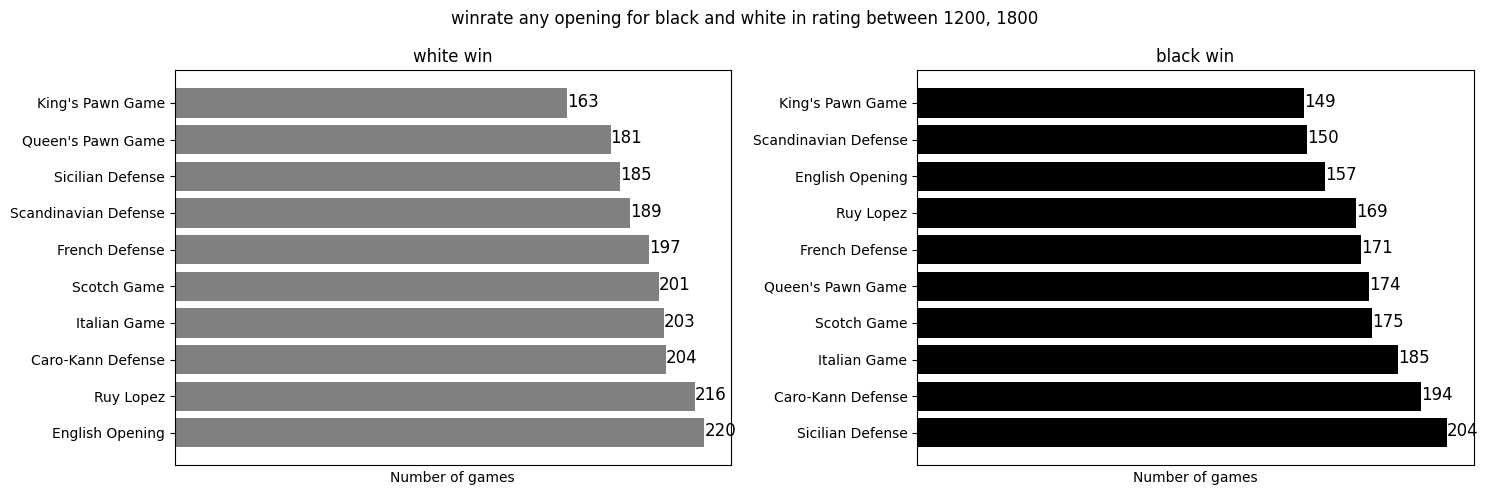

In [63]:
rating_under1200 = equal_game_by_opening[(equal_game_by_opening['white_rating'] > 1200) & (equal_game_by_opening['black_rating'] > 1200)]

white_win = rating_under1200[rating_under1200['winner'] == 'white'].value_counts('opening_name').to_dict()
black_win = rating_under1200[rating_under1200['winner'] == 'black'].value_counts('opening_name').to_dict()

info_barh1 = {"title": "white win",
              "bar_color": "gray",
              "y": list(white_win.keys()),
              "x": list(white_win.values()),
              "x_label": "Number of games"}
info_barh2 = {"title": "black win",
              "bar_color": "black",
              "y": list(black_win.keys()),
              "x": list(black_win.values()),
              "x_label": "Number of games"}
plt_info = {"figsize": (15,5),
            "plt_title": "winrate any opening for black and white in rating between 1200, 1800"}


barh_2(info_barh1, info_barh2, plt_info)
plt.show()


#### best opening for white and black in the rating higher than 1800

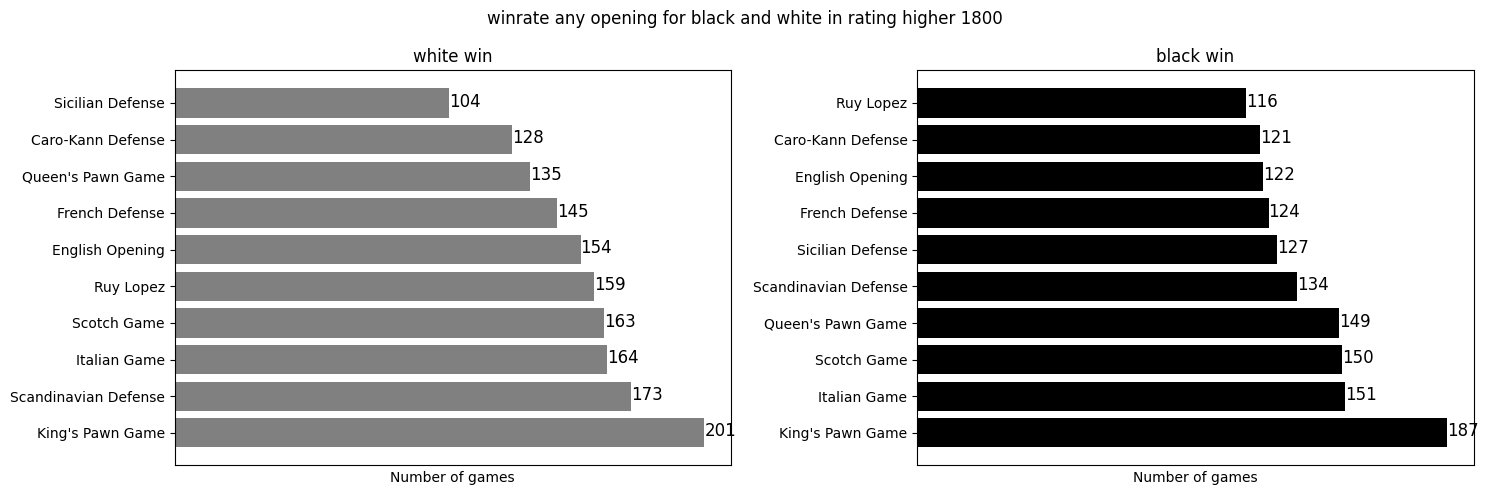

In [65]:
rating_under1200 = equal_game_by_opening[(equal_game_by_opening['white_rating'] <= 1800) & (equal_game_by_opening['black_rating'] <= 1800)]

white_win = rating_under1200[rating_under1200['winner'] == 'white'].value_counts('opening_name').to_dict()
black_win = rating_under1200[rating_under1200['winner'] == 'black'].value_counts('opening_name').to_dict()

info_barh1 = {"title": "white win",
              "bar_color": "gray",
              "y": list(white_win.keys()),
              "x": list(white_win.values()),
              "x_label": "Number of games"}
info_barh2 = {"title": "black win",
              "bar_color": "black",
              "y": list(black_win.keys()),
              "x": list(black_win.values()),
              "x_label": "Number of games"}
plt_info = {"figsize": (15,5),
            "plt_title": "winrate any opening for black and white in rating higher 1800"}


barh_2(info_barh1, info_barh2, plt_info)
plt.show()